### This script was taken from:
### II Summer School on Complex Socio-Technical Systems
# Road Network

code developed by Mateo Neira, distributed by Elsa Arcaute
***

This code will allow you to construct the network representation of the road network. A library has already been developed for this, see **OSMnx**, which is a python library to parse [OpenStreetMap](https://www.openstreetmap.org/) data.


In [2]:
import networkx as nx
import osmnx as ox
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

#### the OSMnx library

Python library that lets you download spatial data from OpenStreetMap and analyze street networks.
https://osmnx.readthedocs.io/en/stable/

OSMnx is built on top of GeoPandas, and Networkx:
* Downloads and creates a networkx graph of street networks or other infrastructure networks
    * Automatically cleans(topologically corrects) the network for you. 
* Download any other spatial geometries (buildings, POI's, place boundaries)


In [3]:
place1 = 'Peten, Guatemala'
G_peten = ox.graph_from_place(place1, network_type='drive')
print(type(G_peten))

<class 'networkx.classes.multidigraph.MultiDiGraph'>


In [9]:
# we can calculate basic street network metrics and display average circuity
stats = ox.basic_stats(G_peten)
stats


{'n': 18531,
 'm': 55084,
 'k_avg': 5.94506502617236,
 'edge_length_total': 15765417.778999966,
 'edge_length_avg': 286.2068437114219,
 'streets_per_node_avg': 3.0193729426366627,
 'streets_per_node_counts': {0: 0,
  1: 3067,
  2: 9,
  3: 8990,
  4: 6430,
  5: 33,
  6: 2},
 'streets_per_node_proportions': {0: 0.0,
  1: 0.16550644865360747,
  2: 0.00048567265662943174,
  3: 0.48513302034428796,
  4: 0.3469861313474718,
  5: 0.0017807997409745831,
  6: 0.00010792725702876261},
 'intersection_count': 15464,
 'street_length_total': 7922560.015000004,
 'street_segment_count': 27972,
 'street_length_avg': 283.2318037680539,
 'circuity_avg': 1.103085571338713,
 'self_loop_proportion': 0.00032175032175032174}

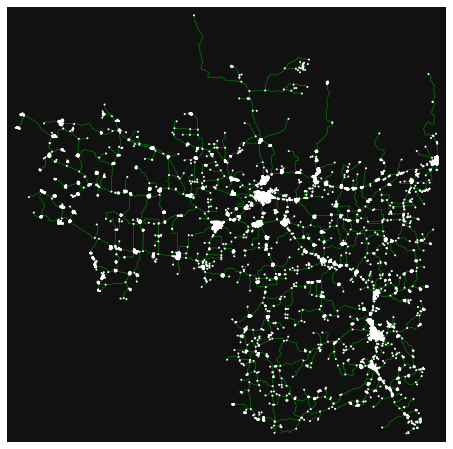

In [4]:
fig, ax = ox.plot_graph(G_peten,node_size=4, edge_color='g', edge_linewidth=0.4)

La ciudad de Peten, Guatemala está conectada por 21313 carreteras.


In [2]:
place1 = 'Boca del Monte, Villa Canales,Guatemala'
G = ox.graph_from_place(place1, network_type='drive')
print(type(G))
# we can calculate basic street network metrics and display average circuity
#stats = ox.basic_stats(G_peten)
#stats

<class 'networkx.classes.multidigraph.MultiDiGraph'>


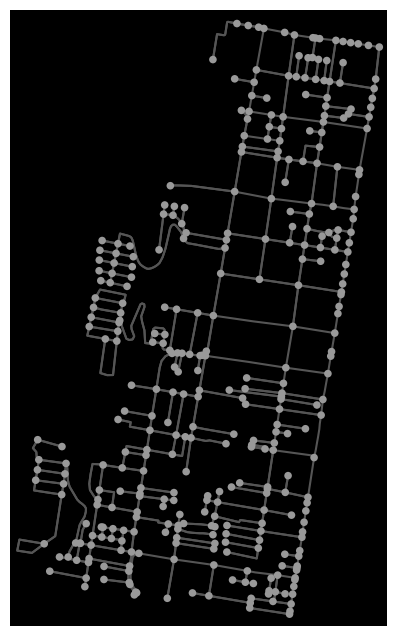

<Figure size 640x480 with 0 Axes>

In [4]:
# download and project a street network
#G = ox.graph_from_place('Piedmont, California', network_type='drive')
G = ox.project_graph(G)
fig, ax = ox.plot_graph(G, bgcolor='k', node_size=30, node_color='#999999', node_edgecolor='none', node_zorder=2,
                        edge_color='#555555', edge_linewidth=1.5, edge_alpha=1)
plt.savefig("imagenes/BocadelMonteBN.pdf", bbox_inches = 'tight')


In [5]:
# we can calculate basic street network metrics and display average circuity
stats = ox.basic_stats(G)
stats


{'n': 354,
 'm': 763,
 'k_avg': 4.3107344632768365,
 'edge_length_total': 62803.736000000026,
 'edge_length_avg': 82.3115806028834,
 'streets_per_node_avg': 2.556497175141243,
 'streets_per_node_counts': {0: 0, 1: 102, 2: 0, 3: 205, 4: 47},
 'streets_per_node_proportions': {0: 0.0,
  1: 0.288135593220339,
  2: 0.0,
  3: 0.5790960451977402,
  4: 0.1327683615819209},
 'intersection_count': 252,
 'street_length_total': 34700.192999999956,
 'street_segment_count': 425,
 'street_length_avg': 81.64751294117637,
 'circuity_avg': 1.0555723954325222,
 'self_loop_proportion': 0.002352941176470588}

In [15]:
# node closeness centrality
node_centrality = nx.closeness_centrality(G)

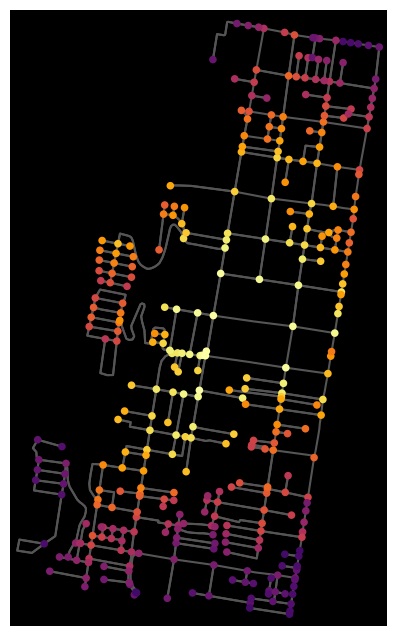

<Figure size 640x480 with 0 Axes>

In [10]:
# plot it
df = pd.DataFrame(data=pd.Series(node_centrality).sort_values(), columns=['cc'])
df['colors'] = ox.plot.get_colors(n=len(df), cmap='inferno', start=0.2)
df = df.reindex(G.nodes())
nc = df['colors'].tolist()
fig, ax = ox.plot_graph(G, bgcolor='k', node_size=30, node_color=nc, node_edgecolor='none', node_zorder=2,
                        edge_color='#555555', edge_linewidth=1.5, edge_alpha=1)
plt.savefig("imagenes/BocadelMonte.pdf", bbox_inches = 'tight')
#guardar esta imagen para poster

In [36]:
place1 = 'Santa Catarina Pinula, Guatemala'
G = ox.graph_from_place(place1, network_type='drive')
print(type(G))
# we can calculate basic street network metrics and display average circuity
#stats = ox.basic_stats(G_peten)
#stats

<class 'networkx.classes.multidigraph.MultiDiGraph'>


In [47]:
node_centrality = nx.degree_centrality(G)

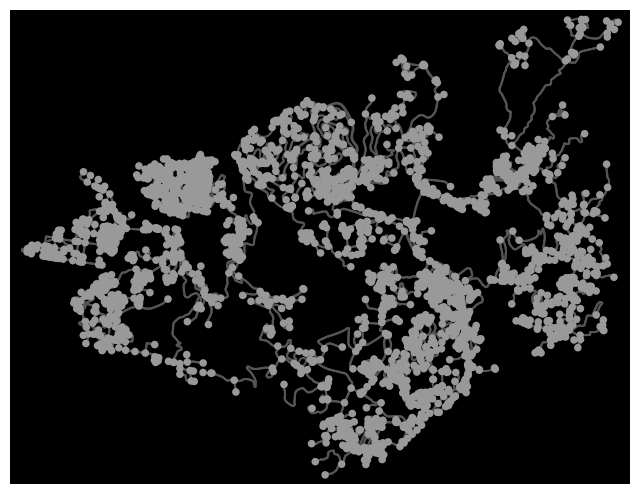

<Figure size 640x480 with 0 Axes>

In [38]:
# download and project a street network
#G = ox.graph_from_place('Piedmont, California', network_type='drive')
G = ox.project_graph(G)
fig, ax = ox.plot_graph(G, bgcolor='k', node_size=30, node_color='#999999', node_edgecolor='none', node_zorder=2,
                        edge_color='#555555', edge_linewidth=1.5, edge_alpha=1)
plt.savefig("imagenes/BocadelMonteBN.pdf", bbox_inches = 'tight')


In [39]:
# we can calculate basic street network metrics and display average circuity
stats = ox.basic_stats(G)
stats


{'n': 2694,
 'm': 5704,
 'k_avg': 4.234595397178916,
 'edge_length_total': 591863.815999999,
 'edge_length_avg': 103.76294109396896,
 'streets_per_node_avg': 2.344469190794358,
 'streets_per_node_counts': {0: 0, 1: 960, 2: 19, 3: 1548, 4: 161, 5: 6},
 'streets_per_node_proportions': {0: 0.0,
  1: 0.35634743875278396,
  2: 0.007052709725315516,
  3: 0.5746102449888641,
  4: 0.05976243504083148,
  5: 0.0022271714922048997},
 'intersection_count': 1734,
 'street_length_total': 321500.29000000097,
 'street_segment_count': 3138,
 'street_length_avg': 102.45388463989833,
 'circuity_avg': 1.1463011894512518,
 'self_loop_proportion': 0.005098789037603569}

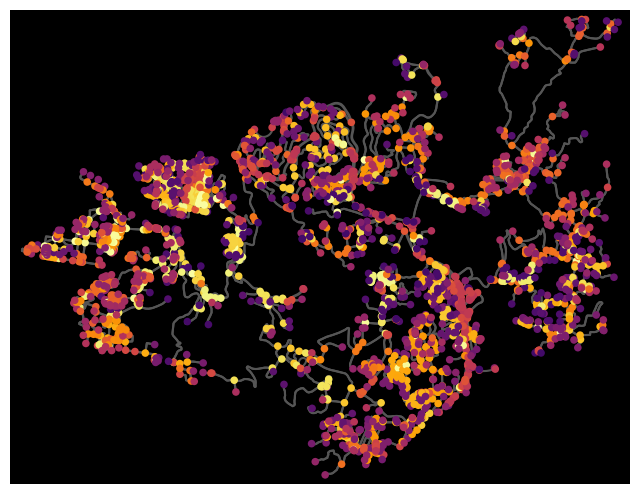

<Figure size 640x480 with 0 Axes>

In [48]:
# plot it
df = pd.DataFrame(data=pd.Series(node_centrality).sort_values(), columns=['cc'])
df['colors'] = ox.plot.get_colors(n=len(df), cmap='inferno', start=0.2)
df = df.reindex(G.nodes())
nc = df['colors'].tolist()
fig, ax = ox.plot_graph(G, bgcolor='k', node_size=30, node_color=nc, node_edgecolor='none', node_zorder=2,
                        edge_color='#555555', edge_linewidth=1.5, edge_alpha=1)
plt.savefig("imagenes/BocadelMonte.pdf", bbox_inches = 'tight')
#guardar esta imagen para poster

In [19]:
location_point = (14.5768611,-90.48425)
#bbox = ox.bbox_from_point(location_point, project_utm=True)
#G2 = ox.graph_from_point(location_point, distance=750, distance_type='bbox', network_type='drive')
G = ox.graph_from_point(location_point)

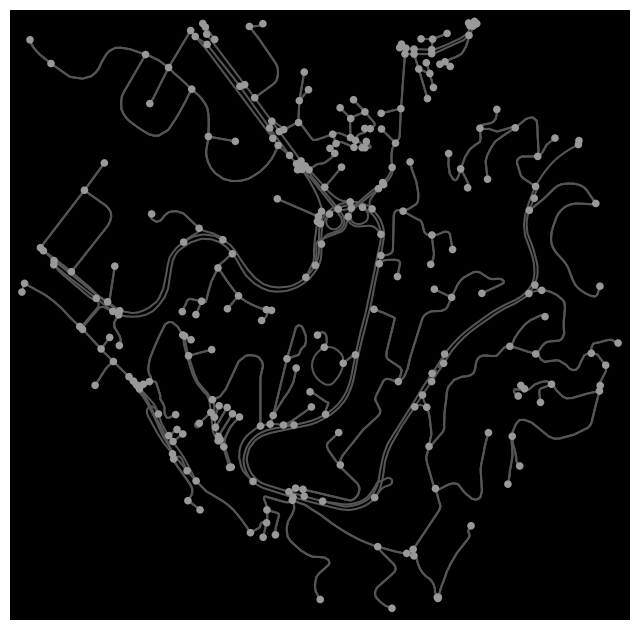

In [31]:
location_point = (14.5768611,-90.48425)
#bbox = ox.bbox_from_point(location_point, project_utm=True)
#G2 = ox.graph_from_point(location_point, distance=750, distance_type='bbox', network_type='drive')
G = ox.graph_from_point(location_point,network_type='drive')

G = ox.project_graph(G)
fig, ax = ox.plot_graph(G, bgcolor='k', node_size=30, node_color='#999999', node_edgecolor='none', node_zorder=2,
                        edge_color='#555555', edge_linewidth=1.5, edge_alpha=1)
plt.show()

In [23]:
# we can calculate basic street network metrics and display average circuity
stats = ox.basic_stats(G)
stats

{'n': 395,
 'm': 750,
 'k_avg': 3.7974683544303796,
 'edge_length_total': 79977.15599999994,
 'edge_length_avg': 106.63620799999993,
 'streets_per_node_avg': 2.4556962025316458,
 'streets_per_node_counts': {0: 0, 1: 110, 2: 6, 3: 268, 4: 11},
 'streets_per_node_proportions': {0: 0.0,
  1: 0.27848101265822783,
  2: 0.015189873417721518,
  3: 0.6784810126582278,
  4: 0.027848101265822784},
 'intersection_count': 285,
 'street_length_total': 49813.77500000002,
 'street_segment_count': 469,
 'street_length_avg': 106.21273987206828,
 'circuity_avg': 1.1919474127902536,
 'self_loop_proportion': 0.014925373134328358}

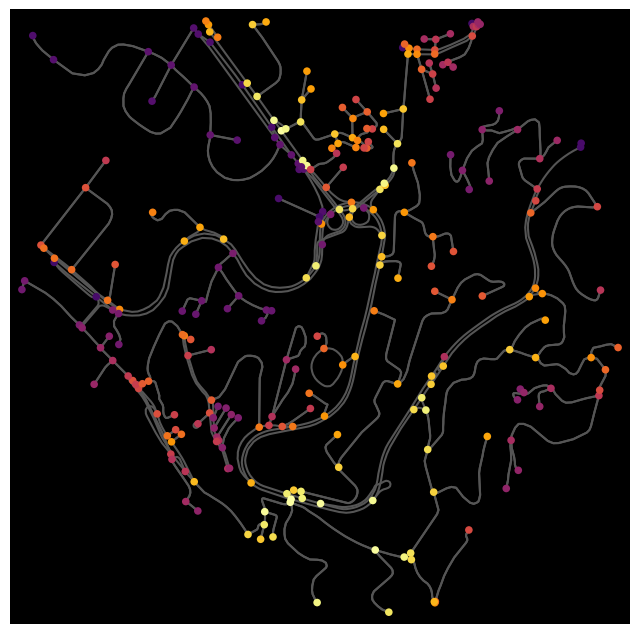

In [35]:
# plot it
location_point = (14.5768611,-90.48425)
#bbox = ox.bbox_from_point(location_point, project_utm=True)
#G2 = ox.graph_from_point(location_point, distance=750, distance_type='bbox', network_type='drive')
G = ox.graph_from_point(location_point,network_type='drive')
node_centrality = nx.closeness_centrality(G)

df = pd.DataFrame(data=pd.Series(node_centrality).sort_values(), columns=['cc'])
df['colors'] = ox.plot.get_colors(n=len(df), cmap='inferno', start=0.2)
df = df.reindex(G.nodes())
nc = df['colors'].tolist()
fig, ax = ox.plot_graph(G, bgcolor='k', node_size=30, node_color=nc, node_edgecolor='none', node_zorder=2,
                        edge_color='#555555', edge_linewidth=1.5, edge_alpha=1)


In [5]:
place2 = 'Alta Verapaz, Guatemala'
G_av = ox.graph_from_place(place2, network_type='drive')


In [7]:
# we can calculate basic street network metrics and display average circuity
stats = ox.basic_stats(G_av)
stats


{'n': 11046,
 'm': 27853,
 'k_avg': 5.0430925221799745,
 'edge_length_total': 12416327.573000154,
 'edge_length_avg': 445.780618712532,
 'streets_per_node_avg': 2.5755929748325186,
 'streets_per_node_counts': {0: 0,
  1: 3237,
  2: 3,
  3: 6033,
  4: 1758,
  5: 14,
  6: 1},
 'streets_per_node_proportions': {0: 0.0,
  1: 0.2930472569255839,
  2: 0.00027159152634437803,
  3: 0.5461705594785443,
  4: 0.15915263443780553,
  5: 0.0012674271229404308,
  6: 9.053050878145935e-05},
 'intersection_count': 7809,
 'street_length_total': 6231122.62199999,
 'street_segment_count': 14204,
 'street_length_avg': 438.6878782033223,
 'circuity_avg': 1.2225313877354478,
 'self_loop_proportion': 0.001126443255421008}

In [8]:
place3 = 'Izabal, Guatemala'
G_izabal = ox.graph_from_place(place3, network_type='drive')


In [9]:
# we can calculate basic street network metrics and display average circuity
stats = ox.basic_stats(G_izabal)
stats


{'n': 9361,
 'm': 23699,
 'k_avg': 5.0633479329131506,
 'edge_length_total': 7928874.921999973,
 'edge_length_avg': 334.5658011730441,
 'streets_per_node_avg': 2.571840615318876,
 'streets_per_node_counts': {0: 0,
  1: 2708,
  2: 3,
  3: 5254,
  4: 1384,
  5: 9,
  6: 3},
 'streets_per_node_proportions': {0: 0.0,
  1: 0.28928533276359364,
  2: 0.00032047858134814656,
  3: 0.5612648221343873,
  4: 0.14784745219527828,
  5: 0.0009614357440444397,
  6: 0.00032047858134814656},
 'intersection_count': 6653,
 'street_length_total': 3985407.619999993,
 'street_segment_count': 12029,
 'street_length_avg': 331.3166198353972,
 'circuity_avg': 1.156550913841245,
 'self_loop_proportion': 0.001413251309335772}

In [2]:
#place4 = 'Zacapa, Guatemala'
place4 = 'zona 7, Ciudad de Guatemala, Departamento de Guatemala, Guatemala'

G= ox.graph_from_place(place4, network_type='drive')


In [3]:
# we can calculate basic street network metrics and display average circuity
stats = ox.basic_stats(G)
stats


{'n': 1887,
 'm': 4838,
 'k_avg': 5.127715951245363,
 'edge_length_total': 350557.8650000001,
 'edge_length_avg': 72.45925279040928,
 'streets_per_node_avg': 2.9231584525702172,
 'streets_per_node_counts': {0: 0, 1: 287, 2: 4, 3: 1169, 4: 422, 5: 4, 6: 1},
 'streets_per_node_proportions': {0: 0.0,
  1: 0.15209326974032855,
  2: 0.0021197668256491787,
  3: 0.6195018547959724,
  4: 0.22363540010598834,
  5: 0.0021197668256491787,
  6: 0.0005299417064122947},
 'intersection_count': 1600,
 'street_length_total': 203160.78100000028,
 'street_segment_count': 2736,
 'street_length_avg': 74.25467141812875,
 'circuity_avg': 1.0385661670020518,
 'self_loop_proportion': 0.001827485380116959}

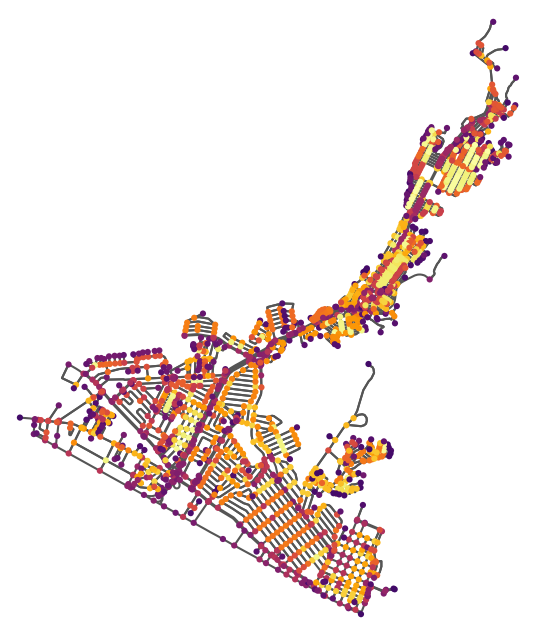

In [14]:
node_centrality = nx.degree_centrality(G)

df = pd.DataFrame(data=pd.Series(node_centrality).sort_values(), columns=['cc'])
df['colors'] = ox.plot.get_colors(n=len(df), cmap='inferno', start=0.2)
df = df.reindex(G.nodes())
nc = df['colors'].tolist()
fig, ax = ox.plot_graph(G, bgcolor='w', node_size=20, node_color=nc, node_edgecolor='none', node_zorder=2,
                        edge_color='#555555', edge_linewidth=1.5, edge_alpha=1)
#plt.colorbar(label="Like/Dislike Ratio", orientation="horizontal")

In [7]:
import matplotlib as mpl


/tmp/ipykernel_4541/1246981093.py:11: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  plt.colorbar(sm, label='Node Degree', ticks=np.linspace(0, 6, N))


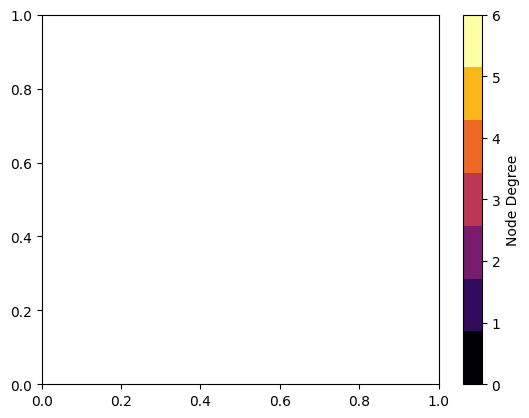

In [17]:
N=7
cmap = plt.get_cmap('inferno', N)
# Normalizer

norm = mpl.colors.Normalize(vmin=0, vmax=6)
  
# creating ScalarMappable
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])
  
plt.colorbar(sm, label='Node Degree', ticks=np.linspace(0, 6, N))
plt.savefig('Percolacion/'+'colorbar.pdf', bbox_inches = 'tight')
plt.show()

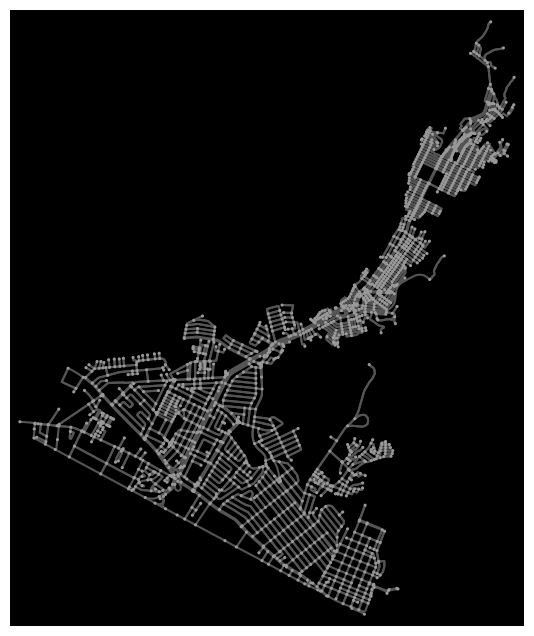

In [58]:
#G = ox.project_graph(G)
fig, ax = ox.plot_graph(G, bgcolor='k', node_size=5, node_color='#999999', node_edgecolor='none', node_zorder=2,
                        edge_color='#555555', edge_linewidth=1.5, edge_alpha=1)
plt.show()

In [12]:
place5 = 'El Progreso, Guatemala'
G_progreso = ox.graph_from_place(place5, network_type='drive')


In [13]:
# we can calculate basic street network metrics and display average circuity
stats = ox.basic_stats(G_progreso)
stats


{'n': 3609,
 'm': 9270,
 'k_avg': 5.13715710723192,
 'edge_length_total': 2564503.5750000034,
 'edge_length_avg': 276.6454773462787,
 'streets_per_node_avg': 2.627043502355223,
 'streets_per_node_counts': {0: 0, 1: 881, 2: 9, 3: 2300, 4: 413, 5: 6},
 'streets_per_node_proportions': {0: 0.0,
  1: 0.24411194236630646,
  2: 0.0024937655860349127,
  3: 0.6372956497644777,
  4: 0.114436131892491,
  5: 0.0016625103906899418},
 'intersection_count': 2728,
 'street_length_total': 1337790.0379999992,
 'street_segment_count': 4726,
 'street_length_avg': 283.070257723233,
 'circuity_avg': 1.2376556872595574,
 'self_loop_proportion': 0.0008463817181548879}

In [14]:
place6 = 'Baja Verapaz, Guatemala'
G_bv = ox.graph_from_place(place6, network_type='drive')

In [15]:
# we can calculate basic street network metrics and display average circuity
stats = ox.basic_stats(G_bv)
stats


{'n': 2761,
 'm': 7421,
 'k_avg': 5.375588554871423,
 'edge_length_total': 3148155.0419999887,
 'edge_length_avg': 424.2224824147674,
 'streets_per_node_avg': 2.7091633466135456,
 'streets_per_node_counts': {0: 0, 1: 659, 2: 0, 3: 1596, 4: 497, 5: 9},
 'streets_per_node_proportions': {0: 0.0,
  1: 0.2386816370880116,
  2: 0.0,
  3: 0.5780514306410721,
  4: 0.18000724375226368,
  5: 0.0032596885186526622},
 'intersection_count': 2102,
 'street_length_total': 1575789.8979999998,
 'street_segment_count': 3731,
 'street_length_avg': 422.3505489145001,
 'circuity_avg': 1.2896622411146315,
 'self_loop_proportion': 0.0005360493165371214}

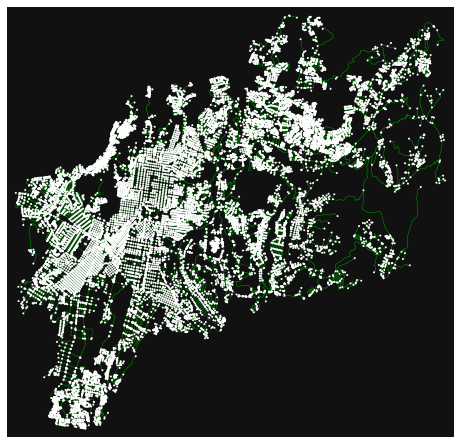

In [2]:
place7 = 'Departamento de Guatemala, Guatemala'
G_gt = ox.graph_from_place(place7, network_type='drive')
# we can calculate basic street network metrics and display average circuity

fig, ax = ox.plot_graph(G_gt,node_size=4, edge_color='g', edge_linewidth=0.4)

In [3]:
stats = ox.basic_stats(G_gt)
stats

{'n': 18925,
 'm': 44195,
 'k_avg': 4.670541611624835,
 'edge_length_total': 3864562.637000004,
 'edge_length_avg': 87.44343561488864,
 'streets_per_node_avg': 2.8182826948480844,
 'streets_per_node_counts': {0: 0,
  1: 3703,
  2: 79,
  3: 11162,
  4: 3925,
  5: 47,
  6: 9},
 'streets_per_node_proportions': {0: 0.0,
  1: 0.195667107001321,
  2: 0.004174372523117569,
  3: 0.5898018494055483,
  4: 0.2073976221928666,
  5: 0.0024834874504623514,
  6: 0.00047556142668428},
 'intersection_count': 15222,
 'street_length_total': 2342877.404999992,
 'street_segment_count': 26637,
 'street_length_avg': 87.95575346322754,
 'circuity_avg': 1.0663045655428298,
 'self_loop_proportion': 0.002027255321545219}

In [2]:
place9 = 'Jalapa, Guatemala'
G_jalapa = ox.graph_from_place(place9, network_type='drive')
print(type(G_jalapa))

<class 'networkx.classes.multidigraph.MultiDiGraph'>


In [3]:
# we can calculate basic street network metrics and display average circuity
stats = ox.basic_stats(G_jalapa)
stats

{'n': 4936,
 'm': 12971,
 'k_avg': 5.2556726094003245,
 'edge_length_total': 3906205.920999996,
 'edge_length_avg': 301.14917284712016,
 'streets_per_node_avg': 2.6924635332252835,
 'streets_per_node_counts': {0: 0, 1: 1168, 2: 2, 3: 2950, 4: 813, 5: 2, 6: 1},
 'streets_per_node_proportions': {0: 0.0,
  1: 0.2366288492706645,
  2: 0.0004051863857374392,
  3: 0.5976499189627229,
  4: 0.16470826580226905,
  5: 0.0004051863857374392,
  6: 0.0002025931928687196},
 'intersection_count': 3768,
 'street_length_total': 1967729.9780000013,
 'street_segment_count': 6624,
 'street_length_avg': 297.06068508454126,
 'circuity_avg': 1.1983653776132877,
 'self_loop_proportion': 0.0006038647342995169}

In [ ]:
fig, ax = ox.plot_graph(G_jalapa,node_size=4, edge_color='g', edge_linewidth=0.4)


In [4]:
place10 = 'Santa Rosa, Guatemala'
G_rosa = ox.graph_from_place(place10, network_type='drive')
print(type(G_jalapa))

<class 'networkx.classes.multidigraph.MultiDiGraph'>


In [5]:
# we can calculate basic street network metrics and display average circuity
stats = ox.basic_stats(G_rosa)
stats

{'n': 4894,
 'm': 12413,
 'k_avg': 5.072742133224357,
 'edge_length_total': 4110079.84099998,
 'edge_length_avg': 331.1109192781745,
 'streets_per_node_avg': 2.6371066612178176,
 'streets_per_node_counts': {0: 0, 1: 1260, 2: 5, 3: 2882, 4: 745, 5: 2},
 'streets_per_node_proportions': {0: 0.0,
  1: 0.25745811197384555,
  2: 0.001021659174499387,
  3: 0.5888843481814466,
  4: 0.15222721700040867,
  5: 0.0004086636697997548},
 'intersection_count': 3634,
 'street_length_total': 2103214.3610000014,
 'street_segment_count': 6433,
 'street_length_avg': 326.9414520441476,
 'circuity_avg': 1.1647628475804945,
 'self_loop_proportion': 0.001088139281828074}

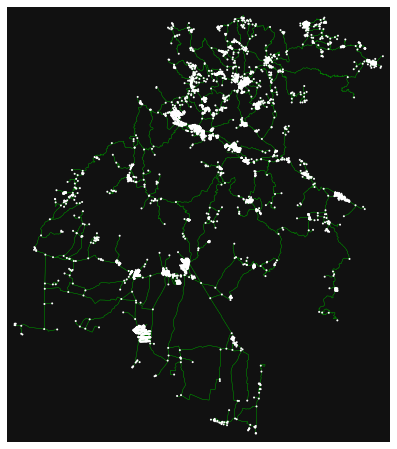

In [6]:
fig, ax = ox.plot_graph(G_rosa,node_size=4, edge_color='g', edge_linewidth=0.4)

In [2]:
place11 = 'Jutiapa, Guatemala'
G_jutiapa = ox.graph_from_place(place11, network_type='drive')
print(type(G_jutiapa))

<class 'networkx.classes.multidigraph.MultiDiGraph'>


In [3]:
# we can calculate basic street network metrics and display average circuity
stats = ox.basic_stats(G_jutiapa)
stats

{'n': 8127,
 'm': 20887,
 'k_avg': 5.140150116894303,
 'edge_length_total': 5679306.917000013,
 'edge_length_avg': 271.9063013836364,
 'streets_per_node_avg': 2.627660883474837,
 'streets_per_node_counts': {0: 0,
  1: 2088,
  2: 10,
  3: 4881,
  4: 1137,
  5: 10,
  6: 1},
 'streets_per_node_proportions': {0: 0.0,
  1: 0.25692137320044295,
  2: 0.0012304663467454166,
  3: 0.6005906238464378,
  4: 0.13990402362495385,
  5: 0.0012304663467454166,
  6: 0.00012304663467454166},
 'intersection_count': 6039,
 'street_length_total': 2855323.2899999875,
 'street_segment_count': 10651,
 'street_length_avg': 268.0803013801509,
 'circuity_avg': 1.141307523584192,
 'self_loop_proportion': 0.0009388789784996713}

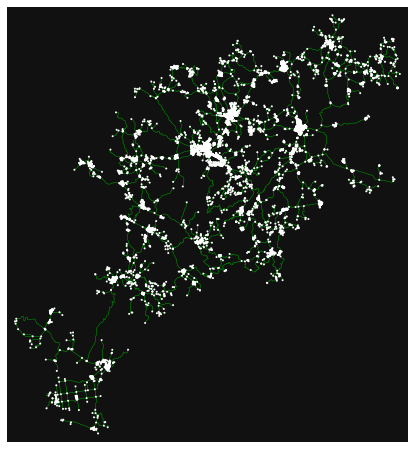

In [4]:
fig, ax = ox.plot_graph(G_jutiapa,node_size=4, edge_color='g', edge_linewidth=0.4)

In [9]:
place12 = 'Chiquimula, Guatemala'
G_chiquimula = ox.graph_from_place(place12, network_type='drive')

In [10]:
# we can calculate basic street network metrics and display average circuity
stats = ox.basic_stats(G_chiquimula)
stats

{'n': 7198,
 'm': 18601,
 'k_avg': 5.168380105584885,
 'edge_length_total': 5390705.725999981,
 'edge_length_avg': 289.80730745658735,
 'streets_per_node_avg': 2.6618505140316753,
 'streets_per_node_counts': {0: 0, 1: 1742, 2: 10, 3: 4397, 4: 1038, 5: 11},
 'streets_per_node_proportions': {0: 0.0,
  1: 0.24201166990830786,
  2: 0.0013892747985551543,
  3: 0.6108641289247013,
  4: 0.144206724090025,
  5: 0.0015282022784106697},
 'intersection_count': 5456,
 'street_length_total': 2717286.5910000084,
 'street_segment_count': 9563,
 'street_length_avg': 284.1458319564999,
 'circuity_avg': 1.2296428115154077,
 'self_loop_proportion': 0.001045696957021855}

In [11]:
place13 = 'Escuintla, Guatemala'
G_escuintla = ox.graph_from_place(place13, network_type='drive')

In [12]:
# we can calculate basic street network metrics and display average circuity
stats = ox.basic_stats(G_escuintla)
stats

{'n': 3190,
 'm': 8097,
 'k_avg': 5.0764890282131665,
 'edge_length_total': 1232826.5790000025,
 'edge_length_avg': 152.2572037791778,
 'streets_per_node_avg': 2.713793103448276,
 'streets_per_node_counts': {0: 0, 1: 722, 2: 7, 3: 1929, 4: 527, 5: 4, 6: 1},
 'streets_per_node_proportions': {0: 0.0,
  1: 0.2263322884012539,
  2: 0.00219435736677116,
  3: 0.6047021943573667,
  4: 0.1652037617554859,
  5: 0.0012539184952978057,
  6: 0.00031347962382445143},
 'intersection_count': 2468,
 'street_length_total': 663157.1820000017,
 'street_segment_count': 4310,
 'street_length_avg': 153.86477540603286,
 'circuity_avg': 1.089972257267893,
 'self_loop_proportion': 0.0009280742459396752}

In [13]:
place14 = 'Suchitepequez, Guatemala'
G_suchi = ox.graph_from_place(place14, network_type='drive')

In [14]:
# we can calculate basic street network metrics and display average circuity
stats = ox.basic_stats(G_suchi)
stats

{'n': 5701,
 'm': 14797,
 'k_avg': 5.1910191194527275,
 'edge_length_total': 3833075.394,
 'edge_length_avg': 259.0440896127593,
 'streets_per_node_avg': 2.685493773022277,
 'streets_per_node_counts': {0: 0,
  1: 1521,
  2: 16,
  3: 2909,
  4: 1247,
  5: 6,
  6: 2},
 'streets_per_node_proportions': {0: 0.0,
  1: 0.26679529907033855,
  2: 0.0028065251710226277,
  3: 0.5102613576565515,
  4: 0.21873355551657603,
  5: 0.0010524469391334855,
  6: 0.00035081564637782847},
 'intersection_count': 4180,
 'street_length_total': 1965958.7650000032,
 'street_segment_count': 7638,
 'street_length_avg': 257.39182573972283,
 'circuity_avg': 1.086289210648916,
 'self_loop_proportion': 0.00013092432573972245}

In [15]:
place15 = 'Retalhuleu, Guatemala'
G_rehu = ox.graph_from_place(place15, network_type='drive')

In [16]:
# we can calculate basic street network metrics and display average circuity
stats = ox.basic_stats(G_rehu)
stats

{'n': 5396,
 'm': 14228,
 'k_avg': 5.27353595255745,
 'edge_length_total': 3382172.6340000173,
 'edge_length_avg': 237.71244264830034,
 'streets_per_node_avg': 2.7227575982209045,
 'streets_per_node_counts': {0: 0, 1: 1290, 2: 3, 3: 3025, 4: 1069, 5: 9},
 'streets_per_node_proportions': {0: 0.0,
  1: 0.2390659747961453,
  2: 0.0005559673832468495,
  3: 0.5606004447739066,
  4: 0.19810971089696072,
  5: 0.0016679021497405485},
 'intersection_count': 4106,
 'street_length_total': 1710478.6030000034,
 'street_segment_count': 7333,
 'street_length_avg': 233.2576848493118,
 'circuity_avg': 1.084314888565912,
 'self_loop_proportion': 0.0006818491749624983}

In [17]:
place16 = 'Solola, Guatemala'
G_solola = ox.graph_from_place(place16, network_type='drive')

In [18]:
# we can calculate basic street network metrics and display average circuity
stats = ox.basic_stats(G_solola)
stats

{'n': 3184,
 'm': 7557,
 'k_avg': 4.746859296482412,
 'edge_length_total': 2224812.0709999986,
 'edge_length_avg': 294.4041380177317,
 'streets_per_node_avg': 2.512562814070352,
 'streets_per_node_counts': {0: 0, 1: 924, 2: 5, 3: 1956, 4: 297, 5: 2},
 'streets_per_node_proportions': {0: 0.0,
  1: 0.29020100502512564,
  2: 0.00157035175879397,
  3: 0.614321608040201,
  4: 0.0932788944723618,
  5: 0.000628140703517588},
 'intersection_count': 2260,
 'street_length_total': 1177929.2160000002,
 'street_segment_count': 3984,
 'street_length_avg': 295.6649638554218,
 'circuity_avg': 1.260223891082605,
 'self_loop_proportion': 0.000251004016064257}

In [19]:
place17 = 'Totonicapan, Guatemala'
G_toto = ox.graph_from_place(place17, network_type='drive')

In [20]:
# we can calculate basic street network metrics and display average circuity
stats = ox.basic_stats(G_toto)
stats

{'n': 3418,
 'm': 8621,
 'k_avg': 5.044470450555881,
 'edge_length_total': 3521441.940000005,
 'edge_length_avg': 408.47256002783956,
 'streets_per_node_avg': 2.583674663545933,
 'streets_per_node_counts': {0: 0, 1: 876, 2: 3, 3: 2208, 4: 330, 5: 1},
 'streets_per_node_proportions': {0: 0.0,
  1: 0.25629022820362785,
  2: 0.0008777062609713282,
  3: 0.6459918080748976,
  4: 0.0965476887068461,
  5: 0.0002925687536571094},
 'intersection_count': 2542,
 'street_length_total': 1777989.5420000004,
 'street_segment_count': 4371,
 'street_length_avg': 406.7695131548845,
 'circuity_avg': 1.2145555985533696,
 'self_loop_proportion': 0.00022878059940517045}

In [21]:
place18 = 'Quetzaltenango, Guatemala'
G_xela = ox.graph_from_place(place18, network_type='drive')

In [22]:
# we can calculate basic street network metrics and display average circuity
stats = ox.basic_stats(G_xela)
stats

{'n': 4891,
 'm': 11462,
 'k_avg': 4.6869760785115515,
 'edge_length_total': 1175713.3689999965,
 'edge_length_avg': 102.57488823939944,
 'streets_per_node_avg': 2.6904518503373542,
 'streets_per_node_counts': {0: 0, 1: 1177, 2: 13, 3: 2871, 4: 807, 5: 23},
 'streets_per_node_proportions': {0: 0.0,
  1: 0.24064608464526682,
  2: 0.00265794316090779,
  3: 0.5869965242281742,
  4: 0.16499693314250666,
  5: 0.004702514823144551},
 'intersection_count': 3714,
 'street_length_total': 649811.1710000016,
 'street_segment_count': 6539,
 'street_length_avg': 99.37470117755034,
 'circuity_avg': 1.0686847441265899,
 'self_loop_proportion': 0.002293928735280624}

In [23]:
place19 = 'San Marcos, Guatemala'
G_sm = ox.graph_from_place(place19, network_type='drive')

In [24]:
# we can calculate basic street network metrics and display average circuity
stats = ox.basic_stats(G_sm)
stats

{'n': 9730,
 'm': 25178,
 'k_avg': 5.175334018499486,
 'edge_length_total': 8675128.461999958,
 'edge_length_avg': 344.55192874731745,
 'streets_per_node_avg': 2.6440904419321685,
 'streets_per_node_counts': {0: 0,
  1: 2461,
  2: 7,
  3: 5804,
  4: 1451,
  5: 6,
  6: 1},
 'streets_per_node_proportions': {0: 0.0,
  1: 0.25292908530318603,
  2: 0.0007194244604316547,
  3: 0.5965056526207605,
  4: 0.14912641315519012,
  5: 0.0006166495375128469,
  6: 0.00010277492291880781},
 'intersection_count': 7269,
 'street_length_total': 4357241.496999999,
 'street_segment_count': 12843,
 'street_length_avg': 339.26975761114994,
 'circuity_avg': 1.2523507074611304,
 'self_loop_proportion': 0.0003893171377404033}

In [25]:
place20 = 'Huehuetenango, Guatemala'
G_huehue = ox.graph_from_place(place20, network_type='drive')

In [26]:
# we can calculate basic street network metrics and display average circuity
stats = ox.basic_stats(G_huehue)
stats

{'n': 11862,
 'm': 29754,
 'k_avg': 5.016691957511381,
 'edge_length_total': 13367753.774000138,
 'edge_length_avg': 449.27585447335275,
 'streets_per_node_avg': 2.544849097959872,
 'streets_per_node_counts': {0: 0, 1: 3363, 2: 9, 3: 7163, 4: 1318, 5: 9},
 'streets_per_node_proportions': {0: 0.0,
  1: 0.2835103692463328,
  2: 0.0007587253414264037,
  3: 0.6038610689597033,
  4: 0.1111111111111111,
  5: 0.0007587253414264037},
 'intersection_count': 8499,
 'street_length_total': 6699652.818000018,
 'street_segment_count': 15058,
 'street_length_avg': 444.9231516801712,
 'circuity_avg': 1.3020242581372206,
 'self_loop_proportion': 0.001461017399389029}

In [27]:
place21 = 'Sacatepéquez, Guatemala'
G_sacatepequez = ox.graph_from_place(place21, network_type='drive')

In [28]:
# we can calculate basic street network metrics and display average circuity
stats = ox.basic_stats(G_sacatepequez)
stats

{'n': 7172,
 'm': 17406,
 'k_avg': 4.853876185164529,
 'edge_length_total': 2386840.724999973,
 'edge_length_avg': 137.12746897621355,
 'streets_per_node_avg': 2.5461517010596766,
 'streets_per_node_counts': {0: 0,
  1: 2054,
  2: 38,
  3: 4200,
  4: 871,
  5: 7,
  6: 2},
 'streets_per_node_proportions': {0: 0.0,
  1: 0.2863915225878416,
  2: 0.005298382598996096,
  3: 0.5856107083100948,
  4: 0.12144450641383157,
  5: 0.0009760178471834914,
  6: 0.0002788622420524261},
 'intersection_count': 5118,
 'street_length_total': 1255458.6730000002,
 'street_segment_count': 9124,
 'street_length_avg': 137.59959151687858,
 'circuity_avg': 1.1190036945334056,
 'self_loop_proportion': 0.001863217886891714}

In [29]:
place22 = 'Chimaltenango, Guatemala'
G_chimal = ox.graph_from_place(place22, network_type='drive')

In [30]:
# we can calculate basic street network metrics and display average circuity
stats = ox.basic_stats(G_chimal)
stats

{'n': 8044,
 'm': 20256,
 'k_avg': 5.03630034808553,
 'edge_length_total': 5956054.164000021,
 'edge_length_avg': 294.03900888625697,
 'streets_per_node_avg': 2.611884634510194,
 'streets_per_node_counts': {0: 0,
  1: 2097,
  2: 7,
  3: 4877,
  4: 1049,
  5: 12,
  6: 2},
 'streets_per_node_proportions': {0: 0.0,
  1: 0.2606911984087519,
  2: 0.000870213823968175,
  3: 0.6062904027846843,
  4: 0.13040775733465937,
  5: 0.0014917951268025858,
  6: 0.0002486325211337643},
 'intersection_count': 5947,
 'street_length_total': 3052998.5870000008,
 'street_segment_count': 10488,
 'street_length_avg': 291.09444956140356,
 'circuity_avg': 1.2320538910046073,
 'self_loop_proportion': 0.0011441647597254005}

In [31]:
place23 = 'Quiche, Guatemala'
G_quiche = ox.graph_from_place(place23, network_type='drive')

In [32]:
# we can calculate basic street network metrics and display average circuity
stats = ox.basic_stats(G_quiche)
stats

{'n': 10875,
 'm': 27791,
 'k_avg': 5.110988505747127,
 'edge_length_total': 11398534.747999845,
 'edge_length_avg': 410.15201856715646,
 'streets_per_node_avg': 2.640183908045977,
 'streets_per_node_counts': {0: 0, 1: 2882, 2: 5, 3: 6149, 4: 1822, 5: 17},
 'streets_per_node_proportions': {0: 0.0,
  1: 0.26501149425287357,
  2: 0.0004597701149425287,
  3: 0.5654252873563218,
  4: 0.16754022988505748,
  5: 0.0015632183908045978},
 'intersection_count': 7993,
 'street_length_total': 5741932.5589999845,
 'street_segment_count': 14316,
 'street_length_avg': 401.08497897457283,
 'circuity_avg': 1.2469035290861645,
 'self_loop_proportion': 0.0008382229673093043}